In [1]:
import sys
import numpy
import pandas
import sklearn

print('python version: {}'.format(sys.version))
print('numpy version: {}'.format(numpy.__version__))
print('pandas version: {}'.format(pandas.__version__))
print('sklearn version: {}'.format(sklearn.__version__))


python version: 3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]
numpy version: 1.16.2
pandas version: 0.23.4
sklearn version: 0.20.3


In [2]:
import numpy as np
from sklearn import *
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

names = ['id', 'clump_thickness', 'uniform-cell-size', 'uniform-cell-shape', 'marginal-adhesion', 
         'single-epthelial-size', 'bare-nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names)

In [4]:
#replacing missing values
df.replace('?', -99999, inplace=True)
#print(df)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform-cell-size', 'uniform-cell-shape',
       'marginal-adhesion', 'single-epthelial-size', 'bare-nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [5]:
#dropping id column, we dont need it
df.drop(['id'], 1, inplace=True)
#describe the data with details
df.describe()

,clump_thickness,uniform-cell-size,uniform-cell-shape,marginal-adhesion,single-epthelial-size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


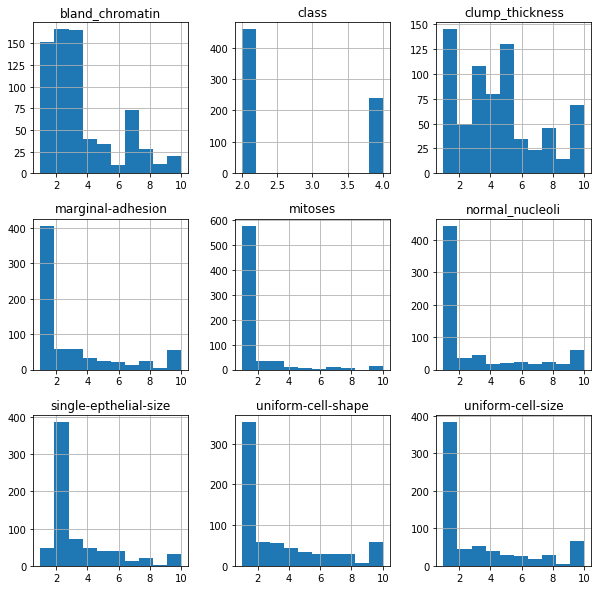

In [6]:
#plot histograms for each variable
df.hist(figsize = (10, 10))
plt.show()


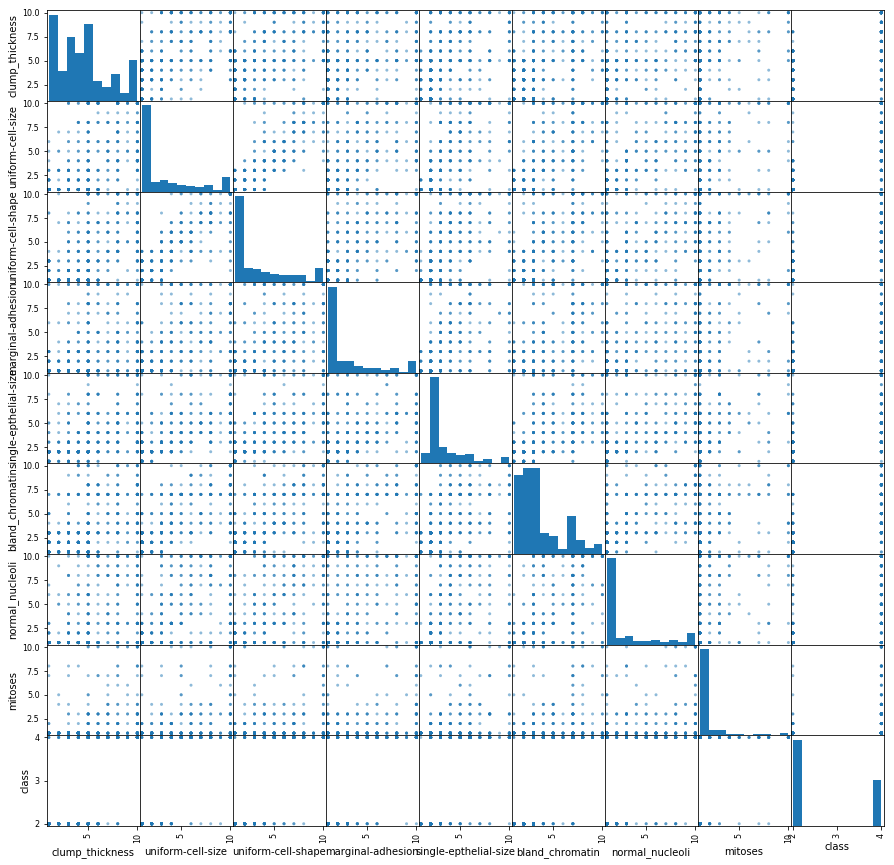

In [7]:
#create scatter_plot matrix
scatter_matrix(df, figsize = (15,15))
plt.show()

#we can observe linear relationship between uniform_cell_size and uniform_cell_shape

In [14]:
#importing splitting method
from sklearn.model_selection import train_test_split

#create X and Y datasets for training
X = np.array(df.drop(['class'], 1))
Y = np.array(df['class'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [9]:
#specify testing options
seed = 8
scoring= 'accuracy'

In [15]:
#define the models to train
#First, import the KNeighborsClassifier module
#and create KNN classifier object by passing argument number of neighbors in KNeighborsClassifier() function.

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import model_selection

models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

#evaluate each model one by one
results = []
names = []

for name, model in models:
    kFold = model_selection.KFold(n_splits = 10, random_state = seed )
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kFold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


#cross_val_score splits the data into 10 equalish sized pieces, 
#trains on each combination of 9 and gives back the accuracy of the estimator on the 10th. 
#The mean and std of these accuracies presumably tells something about the performance   

KNN: 0.971364 (0.026744)
SVM: 0.953474 (0.019922)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/si

In [18]:
#Make predictions
from sklearn.metrics import accuracy_score, classification_report

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))
    
    

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        92
           4       0.96      0.96      0.96        48

   micro avg       0.97      0.97      0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.9714285714285714
              precision    recall  f1-score   support

           2       1.00      0.96      0.98        92
           4       0.92      1.00      0.96        48

   micro avg       0.97      0.97      0.97       140
   macro avg       0.96      0.98      0.97       140
weighted avg       0.97      0.97      0.97       140



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
model = SVC()
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print(accuracy)

predictMyData = np.array([[4,1,3,1,2,5,3,1,1]])
predictMyData = predictMyData.reshape(len(predictMyData), -1)
prediction = model.predict(predictMyData)
print(prediction)

0.9714285714285714
[2]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
